In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 1000); 
pd.set_option('display.max_columns',1000); 
pd.set_option('display.width', 1000);
pd.options.display.float_format = '{:.4f}'.format

In [16]:
movies_data = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
movies_data.shape

(4803, 20)

In [18]:
import ast


# Convertir la colonne 'genres' en une liste de dictionnaires

movies_data['genres'] = movies_data['genres'].apply(ast.literal_eval)



# Extraire uniquement les noms des genres

movies_data['genre_names'] = movies_data['genres'].apply(lambda x: [genre['name'] for genre in x])



# Identifier tous les genres uniques

all_genres = set(genre for genres_list in movies_data['genre_names'] for genre in genres_list)



# Créer une colonne pour chaque genre avec des indicateurs binaires

for genre in all_genres:

    movies_data[genre] = movies_data['genre_names'].apply(lambda x: 1 if genre in x else 0)

movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names,Fantasy,Horror,Animation,War,Adventure,Western,Thriller,Crime,Drama,TV Movie,Action,Music,Science Fiction,Romance,Foreign,Mystery,Comedy,Documentary,Family,History
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.4376,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0000,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2000,11800,"[Action, Adventure, Fantasy, Science Fiction]",1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.0826,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9000,4500,"[Adventure, Fantasy, Action]",1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.3768,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0000,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3000,4466,"[Action, Adventure, Crime]",0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.3130,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6000,9106,"[Action, Crime, Drama, Thriller]",0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.9270,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1000,2124,"[Action, Adventure, Science Fiction]",0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [5]:
movies_data['genre_names'].value_counts()

genre_names
[Drama]                         370
[Comedy]                        282
[Drama, Romance]                164
[Comedy, Romance]               144
[Comedy, Drama]                 142
                               ... 
[Comedy, Horror, Thriller]        1
[Animation, Comedy, Drama]        1
[Science Fiction, Family]         1
[Horror, Drama]                   1
[Action, Adventure, Western]      1
Name: count, Length: 1175, dtype: int64

In [6]:
# Définir une logique pour regrouper les genres en catégories distinctes
def assign_genre_group(genres):
    if any(g in genres for g in ['Action', 'Adventure', 'Science Fiction', 'Fantasy']):
        return 'Action/Aventure'
    elif any(g in genres for g in ['Drama', 'Romance', 'History']):
        return 'Drame/Emotionnel'
    elif 'Comedy' in genres:
        return 'Comédie'
    elif any(g in genres for g in ['Horror', 'Thriller', 'Crime']):
        return 'Horreur/Thriller'
    elif 'Documentary' in genres:
        return 'Documentaire'
    elif 'Animation' in genres:
        return 'Animation'
    else:
        return 'Autre'

# Appliquer cette logique à la colonne genre_names pour créer un groupe distinct
movies_data['distinct_genre_group'] = movies_data['genre_names'].apply(assign_genre_group)

movies_data[['distinct_genre_group']].value_counts()


distinct_genre_group
Drame/Emotionnel        1971
Action/Aventure         1830
Comédie                  496
Horreur/Thriller         324
Documentaire              86
Autre                     59
Animation                 37
Name: count, dtype: int64

C:\Users\const\AppData\Local\Temp\ipykernel_12812\700096876.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


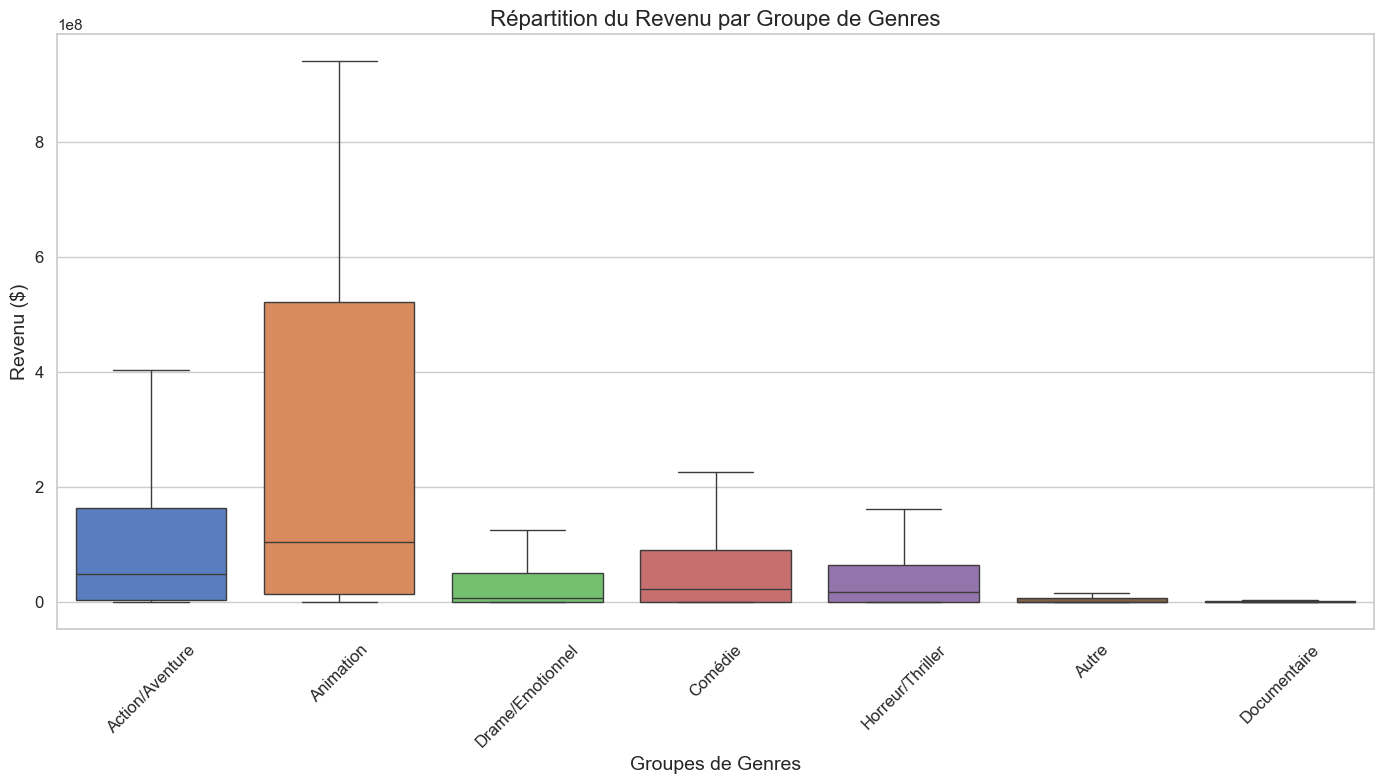

In [7]:
import matplotlib.pyplot as plt

# Préparer les données pour le boxplot
boxplot_data = movies_data[['distinct_genre_group', 'revenue']].copy()
import seaborn as sns

# Configurer le style pour un graphique plus esthétique
sns.set_theme(style="whitegrid")

# Créer un boxplot plus esthétique avec Seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=boxplot_data,
    x='distinct_genre_group',
    y='revenue',
    palette="muted",
    showfliers=False
)

# Ajouter des titres et des labels
plt.title('Répartition du Revenu par Groupe de Genres', fontsize=16)
plt.xlabel('Groupes de Genres', fontsize=14)
plt.ylabel('Revenu ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Ajuster les marges pour une meilleure lisibilité
plt.tight_layout()

# Afficher le graphique
plt.show()


C:\Users\const\AppData\Local\Temp\ipykernel_12812\381115526.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


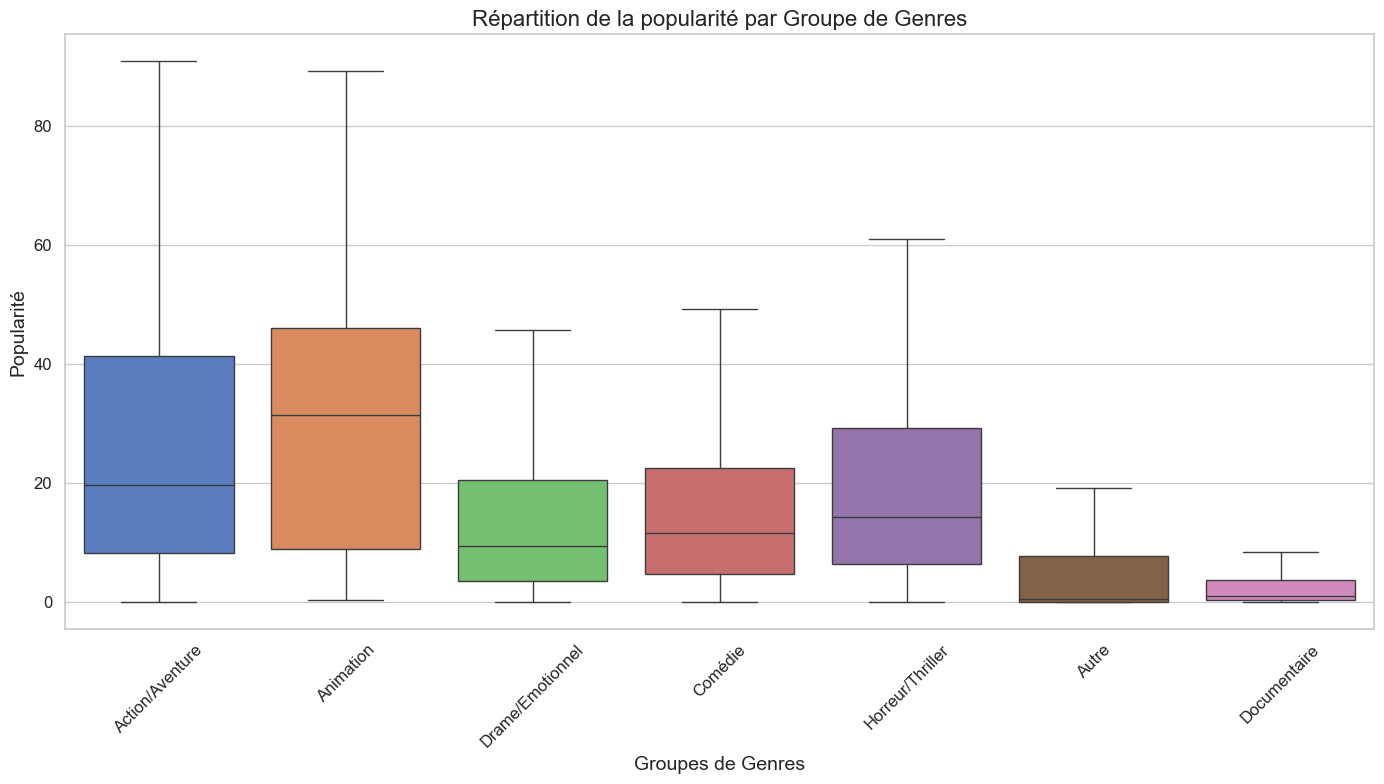

In [8]:
import matplotlib.pyplot as plt


# Préparer les données pour le boxplot
boxplot_data = movies_data[['distinct_genre_group', 'popularity']].copy()
import seaborn as sns

# Configurer le style pour un graphique plus esthétique
sns.set_theme(style="whitegrid")

# Créer un boxplot plus esthétique avec Seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=boxplot_data,
    x='distinct_genre_group',
    y='popularity',
    palette="muted",
    showfliers=False
)

# Ajouter des titres et des labels
plt.title('Répartition de la popularité par Groupe de Genres', fontsize=16)
plt.xlabel('Groupes de Genres', fontsize=14)
plt.ylabel('Popularité', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Ajuster les marges pour une meilleure lisibilité
plt.tight_layout()

# Afficher le graphique
plt.show()


C:\Users\const\AppData\Local\Temp\ipykernel_12812\4251325283.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


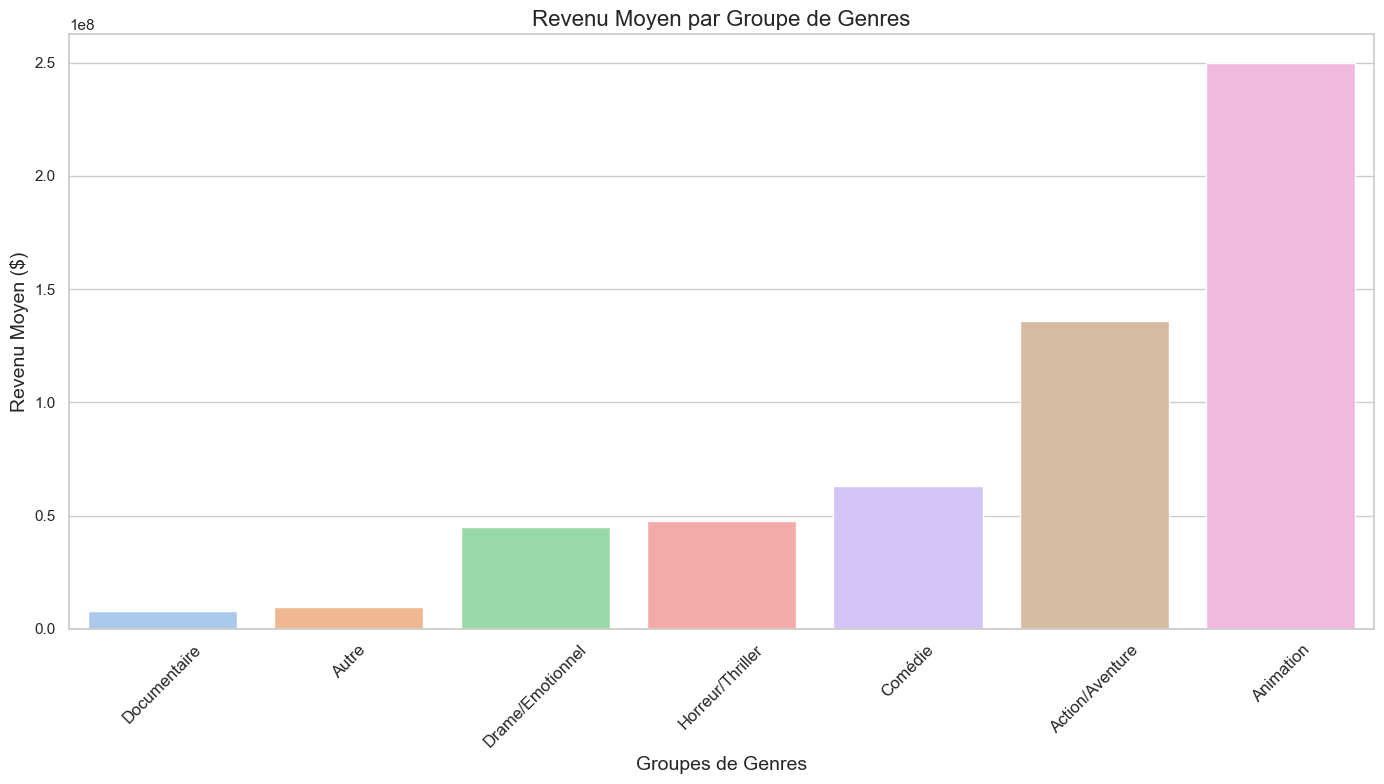

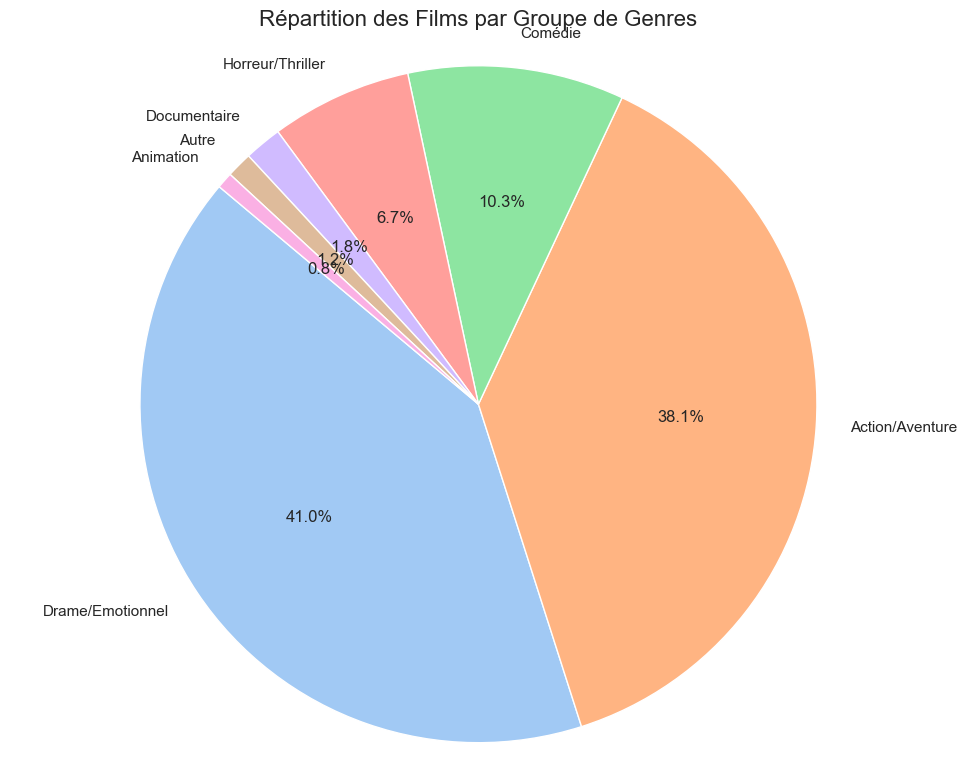

In [9]:
# Préparer les données pour le boxplot
boxplot_data = movies_data[['distinct_genre_group', 'revenue']].copy()
# Préparer les données pour un graphique à barres (moyenne des revenus par groupe)
mean_revenue = boxplot_data.groupby('distinct_genre_group')['revenue'].mean().sort_values()

# Graphique 1 : Barplot des revenus moyens par groupe de genres
plt.figure(figsize=(14, 8))
sns.barplot(
    x=mean_revenue.index,
    y=mean_revenue.values,
    palette="pastel"
)
plt.title('Revenu Moyen par Groupe de Genres', fontsize=16)
plt.xlabel('Groupes de Genres', fontsize=14)
plt.ylabel('Revenu Moyen ($)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Graphique 2 : Pie chart pour la proportion des films par groupe de genres
genre_counts = movies_data['distinct_genre_group'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(
    genre_counts,
    labels=genre_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel", len(genre_counts))
)
plt.title('Répartition des Films par Groupe de Genres', fontsize=16)
plt.axis('equal')  # Assurer un cercle parfait
plt.tight_layout()
plt.show()

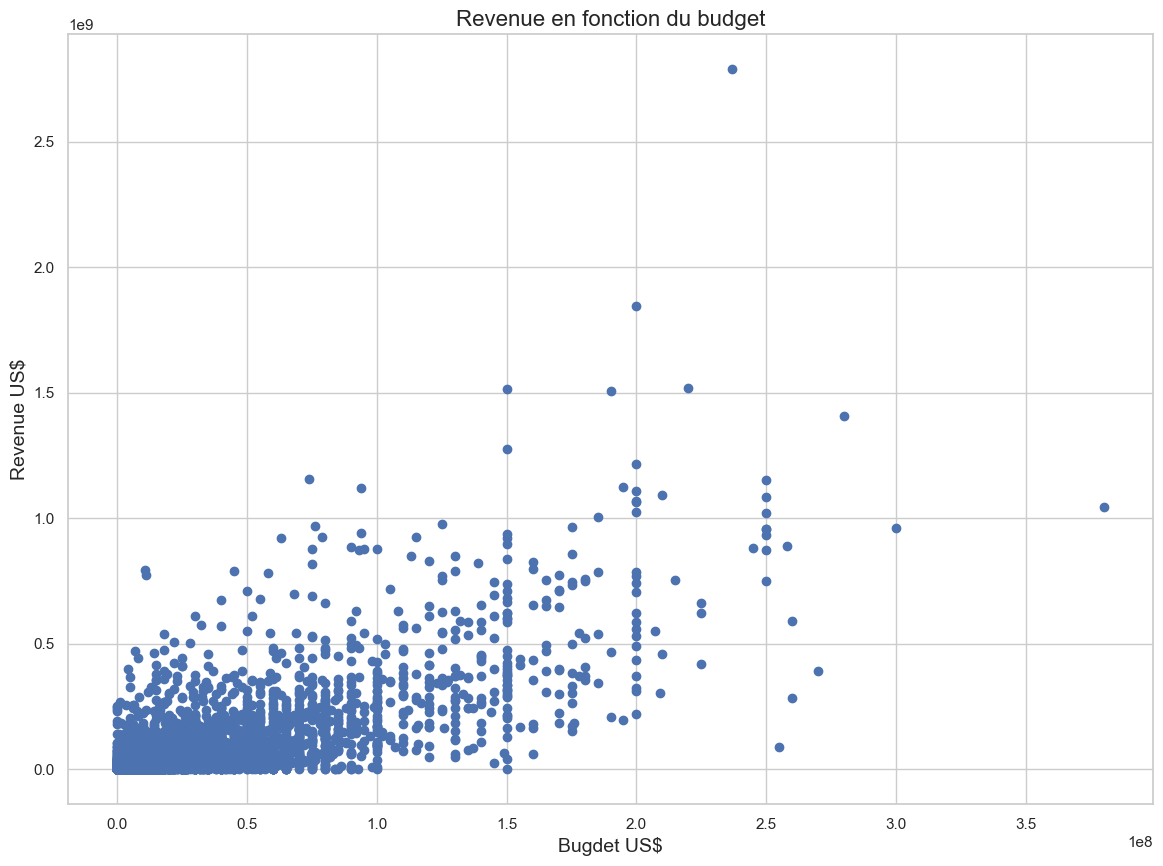

In [23]:
plt.figure(figsize= (14,10))
plt.scatter(movies_data['budget'], movies_data['revenue'])
plt.title('Revenue en fonction du budget', fontsize= 16)
plt.xlabel('Bugdet US$', fontsize=14)
plt.ylabel('Revenue US$', fontsize=14)
plt.show();





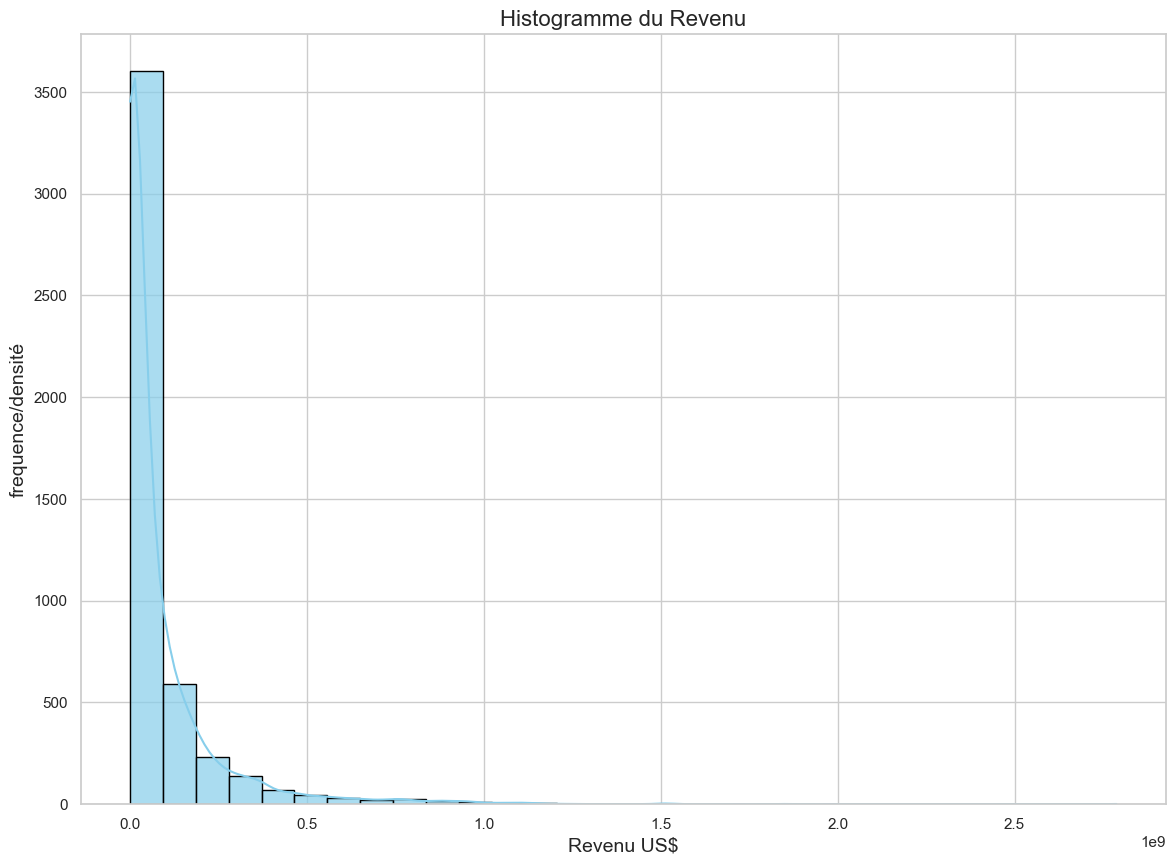

In [24]:
plt.figure(figsize= (14,10))
sns.histplot(movies_data['revenue'], bins =30, kde= True, color ='skyblue', edgecolor ='black', alpha =0.7)
plt.title('Histogramme du Revenu', fontsize= 16)
plt.xlabel('Revenu US$', fontsize=14)
plt.ylabel('frequence/densité', fontsize=14)
plt.show();

c:\Users\const\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


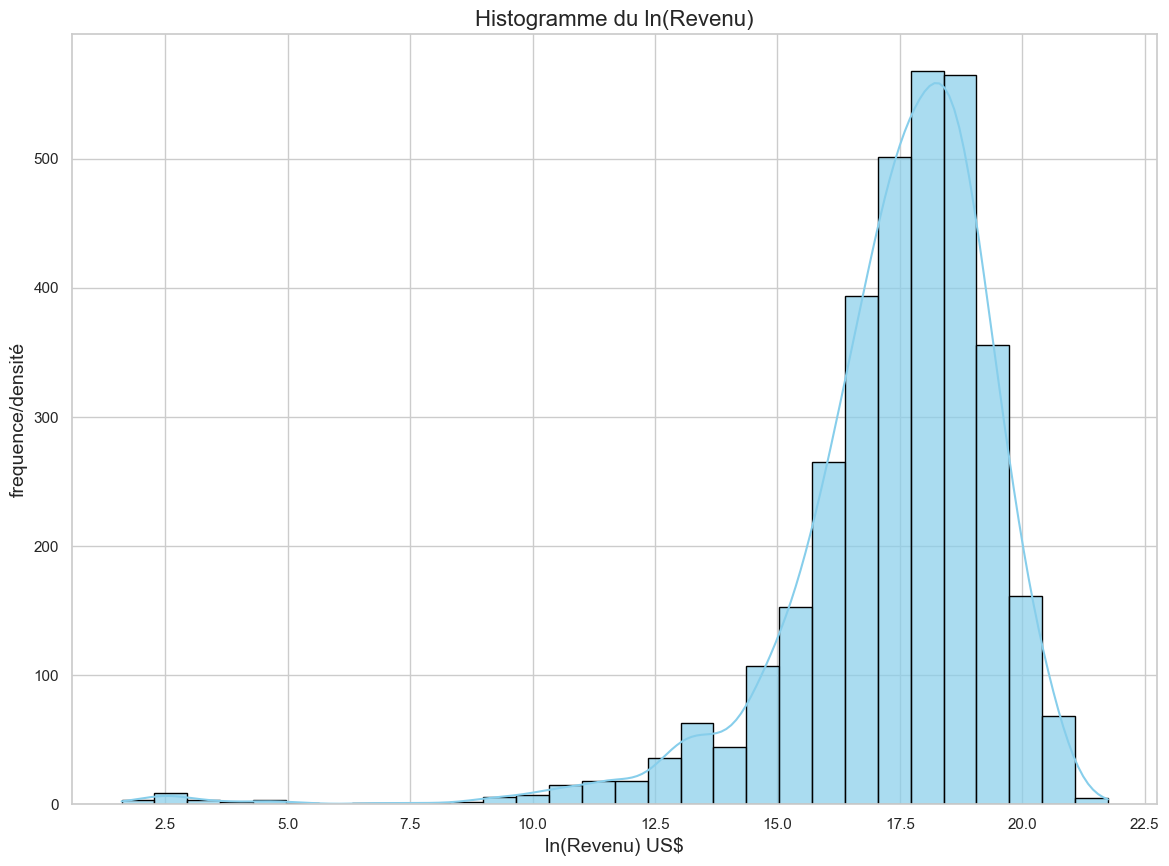

In [25]:
plt.figure(figsize= (14,10))
sns.histplot(np.log(movies_data['revenue']), bins =30, kde= True, color ='skyblue', edgecolor ='black', alpha =0.7)
plt.title('Histogramme du ln(Revenu)', fontsize= 16)
plt.xlabel('ln(Revenu) US$', fontsize=14)
plt.ylabel('frequence/densité', fontsize=14)
plt.show();